# Census Income Project

**PROJECT DESCRIPTION**

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). ***The prediction task is to determine whether a person makes over $50K a year***.

Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.	A single cell estimate of the population 16+ for each state.

2.	Controls for Hispanic Origin by age and sex.

3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv



In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pt
import warnings
warnings.filterwarnings('ignore')

In [159]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


From above we see that there are total of 32560 rows and 15 columns from which Income will be our target column. And as we know that we have to predict if a person earns more than 50k or not , so it will be a classification problem with only two outcomes.

## Exploratory Data Analysis

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


From above we see that there are no null values present in any of the column and the dataset is a mixture of object datatype and integer datatype, so after checking for duplicate values we will seperate the columns using list function for our ease.

In [155]:
df.duplicated().sum()

24

In [165]:
df=df.drop_duplicates()

As we had 24 duplicated values we have dropped them

In [9]:
int_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='int64':
        int_cols.append(i)
    
obj_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        obj_cols.append(i)

print('Integer columns are=',int_cols,'\n')
print('Object columns are=',obj_cols)

Integer columns are= ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week'] 

Object columns are= ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [161]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


From the above details we can notice the following-
1) Range,Mean and Standard deviation of each column
2) There maybe some outliers present as 75 % values and max vaues have huge gaps
3) Skewness present in some columns as mean and median (50%) values are different for some columns.

In [14]:
df.describe(include='object')

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


From above desribe function we are describing the data from all the object type columns and we notice the following-
1) Unique values in each columns
2) Most frequent value in each column. (mode)
3) Frequency of the most occuring value.

In [162]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

From above we can see the number of unique values present in each column.

In [20]:
for i in obj_cols:
    print(("\033[1m"+i+"\033[0m"))
    print(df[i].value_counts())
    print("-"*30)

Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
------------------------------
Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
------------------------------
Marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Ma

From above we see every unique value present in object columns. And we see that some of the columns have '?' value present. So we will replace it with the value 'unknown'.

In [21]:
df['Workclass'].replace({' ?':' Unknown'},inplace=True)
df['Occupation'].replace({' ?':' Unknown'},inplace=True)
df['Native_country'].replace({' ?':' Unknown'},inplace=True)

## Visualisation

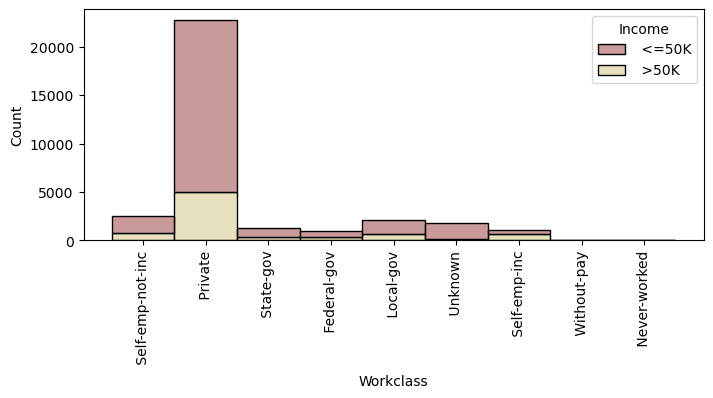

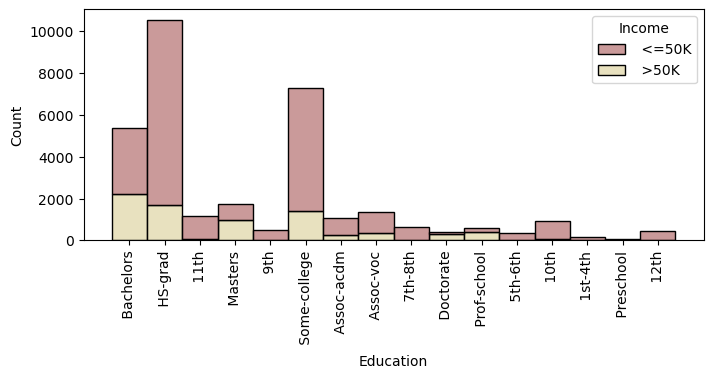

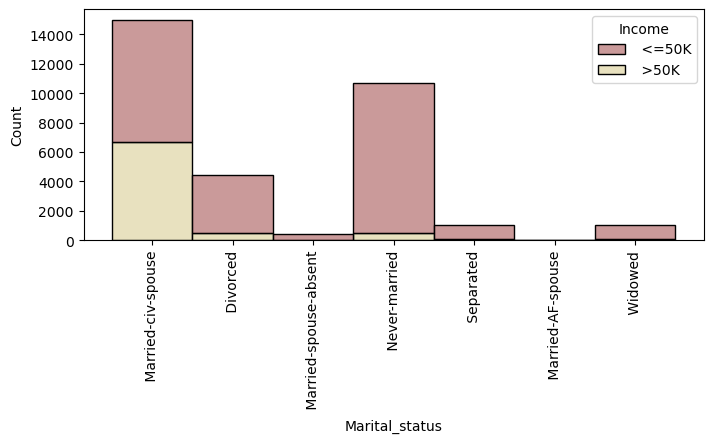

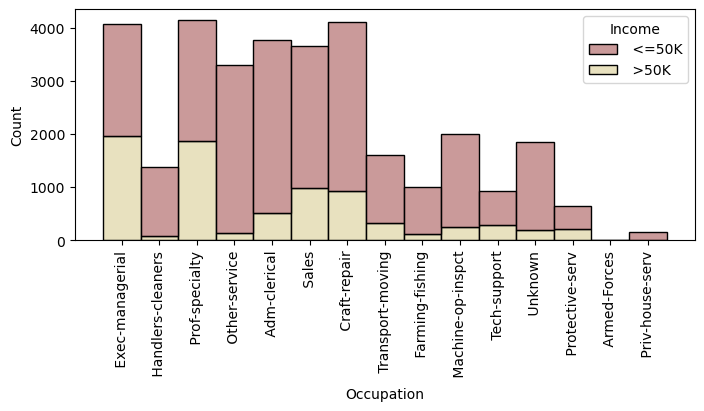

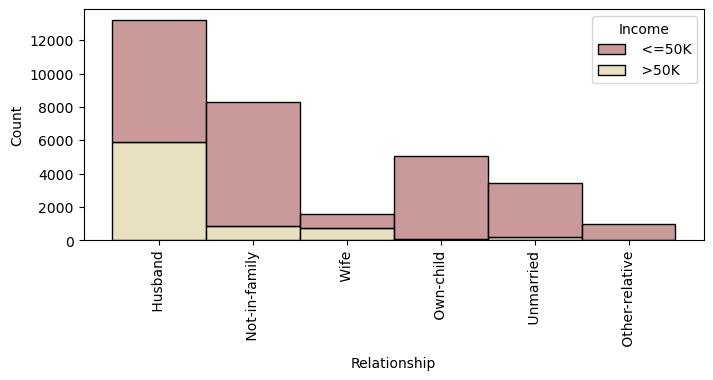

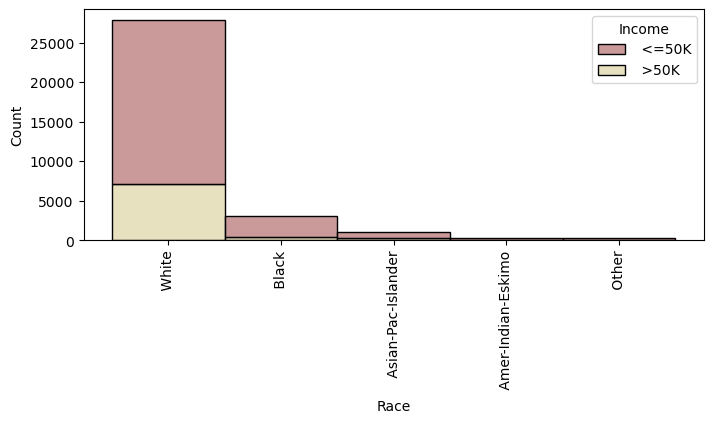

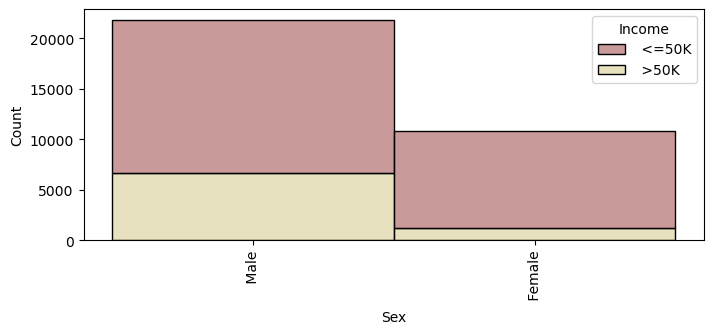

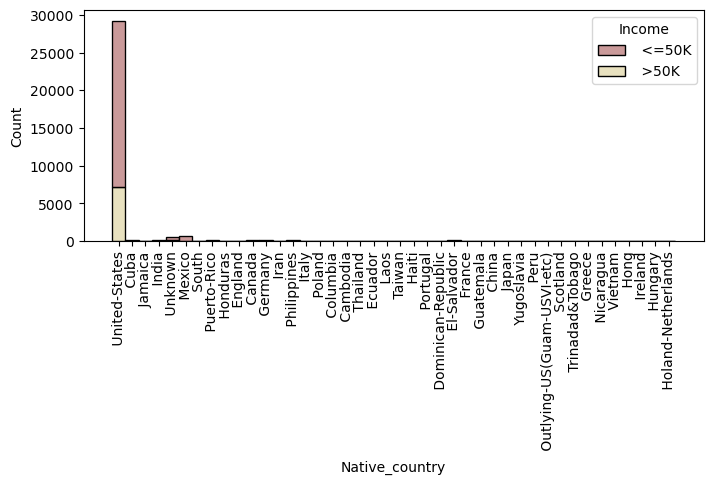

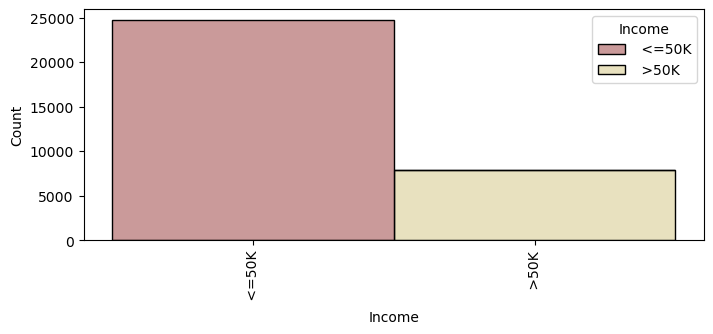

In [138]:
for i in obj_cols:
    pt.figure(figsize=(8,3))
    sb.histplot(x=df[i],palette='pink',multiple="stack",hue=df['Income'])
    pt.xticks(rotation=90)
    pt.show()

We have plotted count plots for each category column with income as hue which shows how each column is distributed with two possibilities of income.

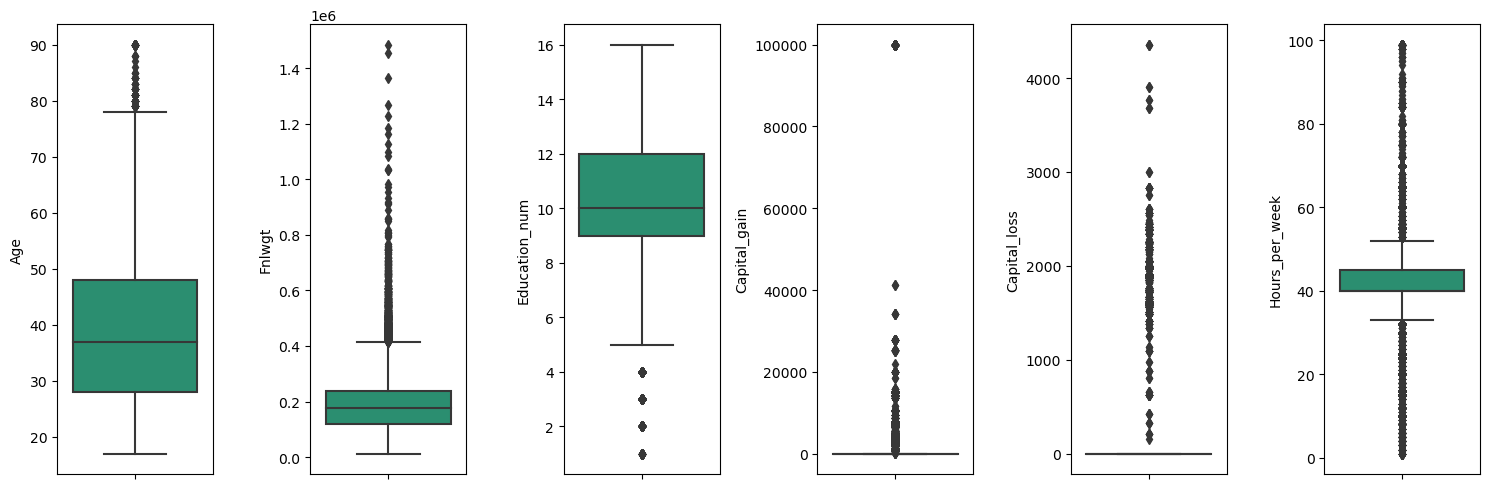

In [66]:
fig, ax = pt.subplots(ncols=6, nrows=1, figsize=(15,5))
index = 0
for col, value in df[int_cols].items():
    sb.boxplot(y=col, data=df, ax=ax[index], palette="Dark2")
    index += 1
pt.tight_layout()
pt.show()

From above boxplot we can see that there are outliers present in the data whill we will remove in later stages.

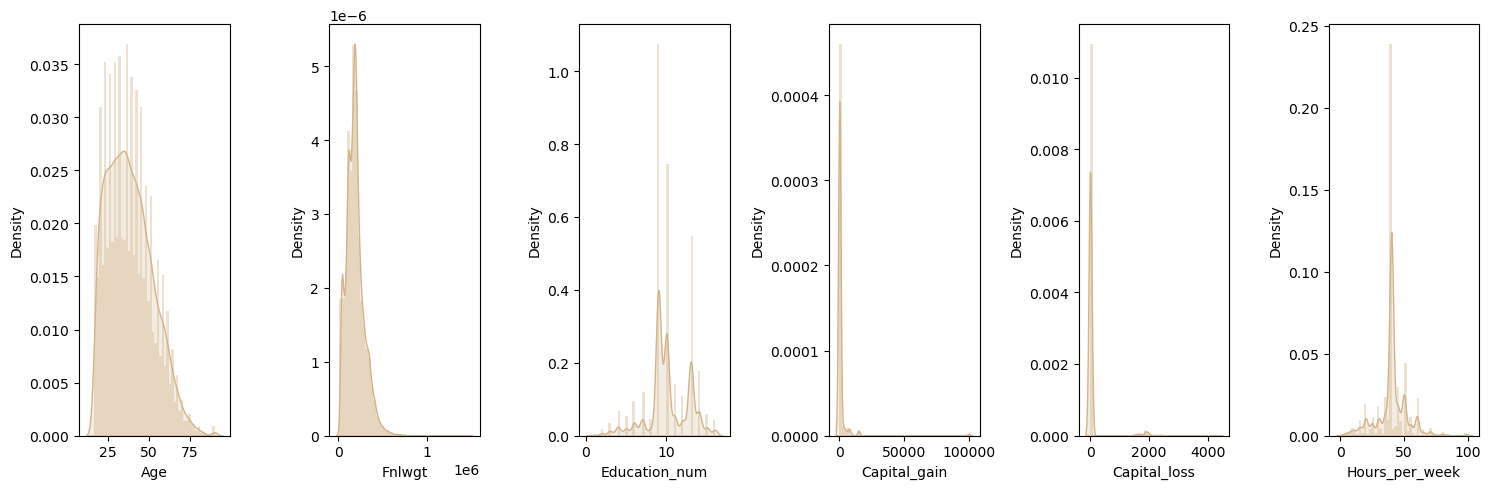

In [121]:
fig, ax = pt.subplots(ncols=6, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[int_cols].items():
    sb.distplot(value, ax=ax[index],  color="tan", kde_kws={"shade": True})
    index += 1
pt.tight_layout()
pt.show()

From above histograms we see that the data is not normally distrubuted and hence skewed , so we will remove the skewness in later stages

In [81]:
print(int_cols)
print(obj_cols)

['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']
['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


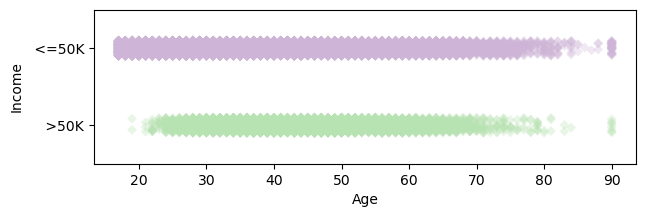

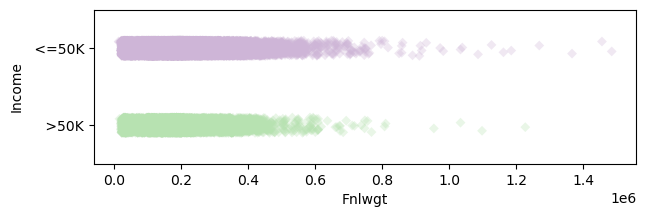

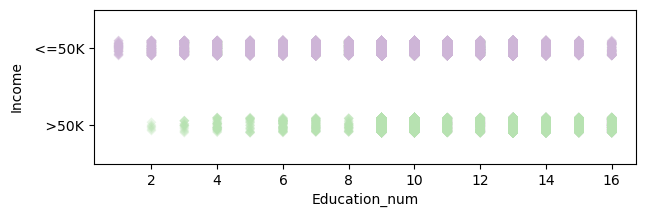

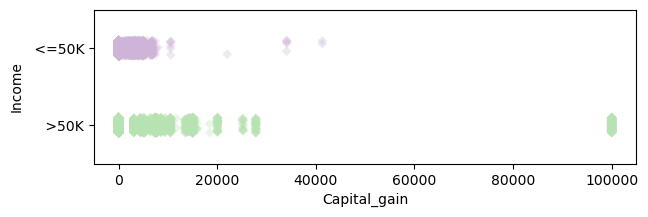

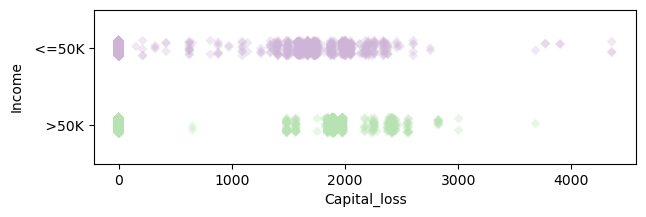

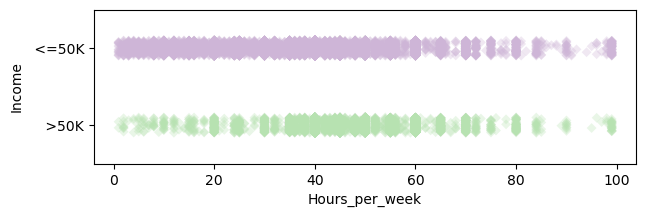

In [120]:
for i in int_cols:
    pt.figure(figsize=(7,2))
    sb.stripplot(y=df['Income'],x=df[i],palette='PRGn',marker='D',alpha=.3)
    pt.show()

From above graphs we have plotted relationships between different integer columns with the Income column.

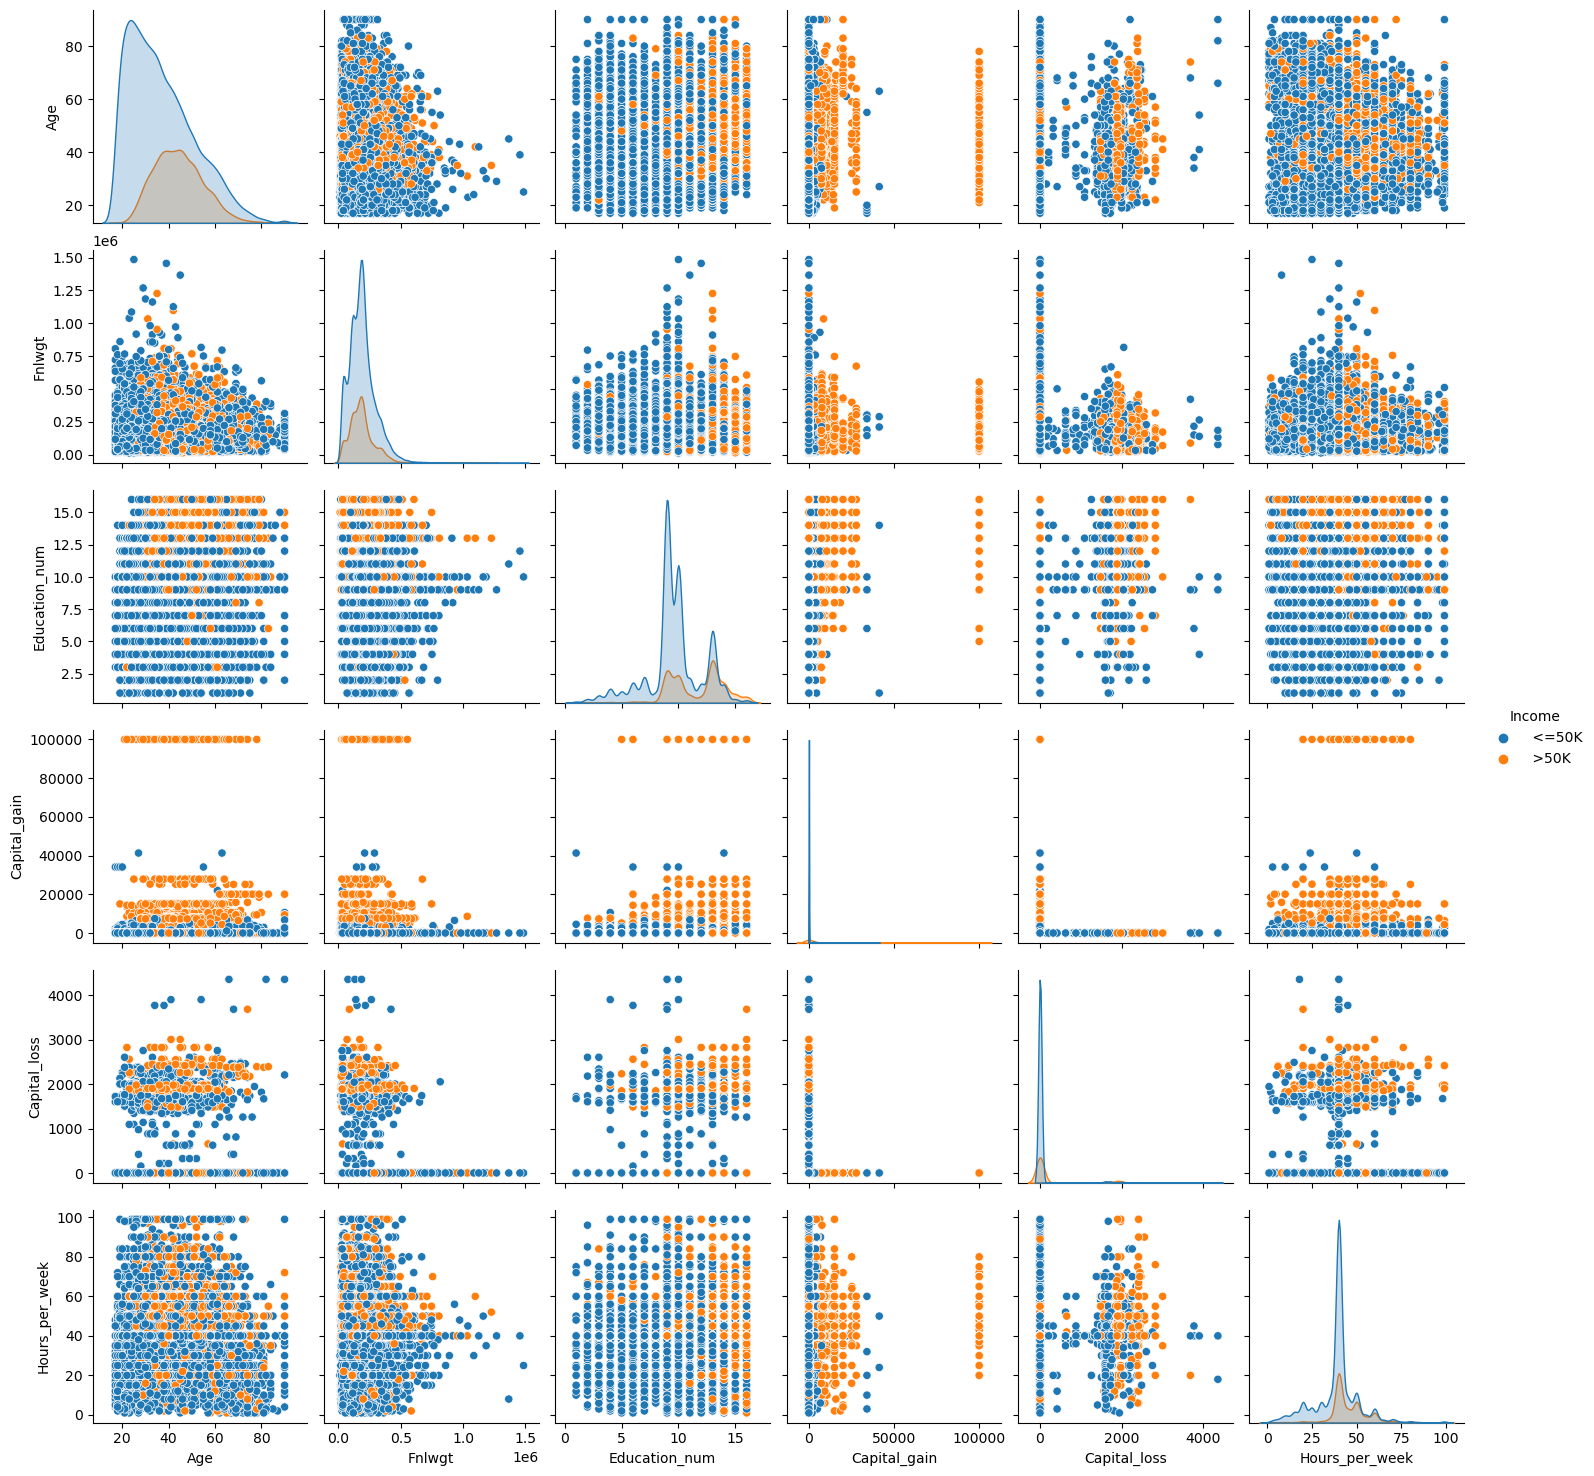

In [143]:
sb.pairplot(data=df,hue='Income')

<Axes: >

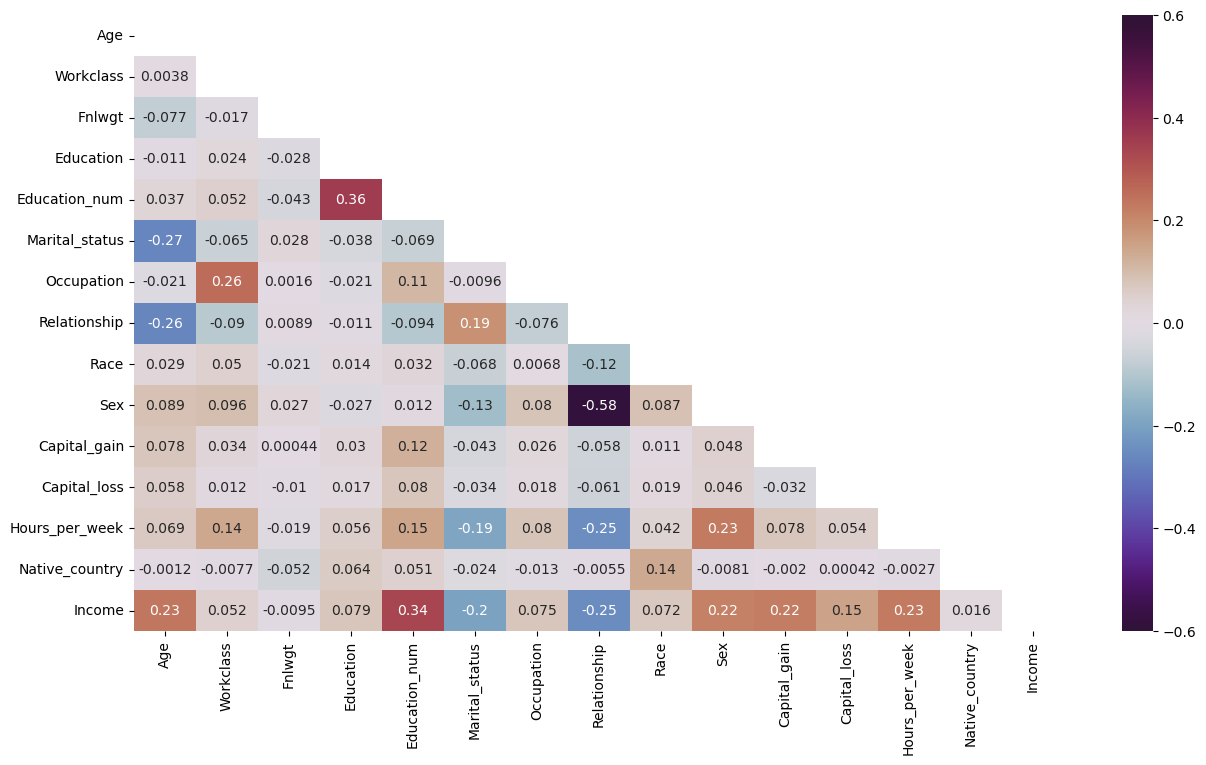

In [150]:
pt.figure(figsize=(15,8))
sb.heatmap(df.corr(),mask=np.triu(df.corr()),cmap='twilight_shifted',vmin=-.6,vmax=.6,annot=True)

We can see how the variables are correlated with each other with this heatmap. The strength of the correlation increases as the value moves away from 0 toward -1 or 1. 

## Encoding 

In [139]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [166]:
le = LabelEncoder()
df["Income"] = le.fit_transform(df["Income"])

oe = OrdinalEncoder()
df['Workclass'] = oe.fit_transform(df['Workclass'].values.reshape(-1,1))
df['Education'] = oe.fit_transform(df['Education'].values.reshape(-1,1))
df['Marital_status'] = oe.fit_transform(df['Marital_status'].values.reshape(-1,1))
df['Occupation'] = oe.fit_transform(df['Occupation'].values.reshape(-1,1))
df['Relationship'] = oe.fit_transform(df['Relationship'].values.reshape(-1,1))
df['Native_country'] = oe.fit_transform(df['Native_country'].values.reshape(-1,1))
df['Race'] = oe.fit_transform(df['Race'].values.reshape(-1,1))
df['Sex'] = oe.fit_transform(df['Sex'].values.reshape(-1,1))
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0


## Outlier removal using zscore

In [168]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (32536, 15)
Shape of the dataframe after removing outliers:  (27399, 15)
Percentage of data loss post outlier removal:  15.788664863535775


the dataloss is 15.7% which is higher than the accepted range (10%), but since the dataset still has many relevant data(27751 rows and 15 columns left ), we can afford to have this much of dataloss.

## Removing skewness using log

In [169]:
df.skew()

Age                0.557657
Workclass         -0.751854
Fnlwgt             1.447695
Education         -0.934180
Education_num     -0.309454
Marital_status    -0.012692
Occupation         0.114542
Relationship       0.786514
Race              -2.435283
Sex               -0.719400
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
Native_country    -3.661060
Income             1.211640
dtype: float64

In [170]:
for col in int_cols:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [171]:
df.skew()

Age              -0.113859
Workclass        -0.751854
Fnlwgt           -0.842301
Education        -0.934180
Education_num    -0.309454
Marital_status   -0.012692
Occupation        0.114542
Relationship      0.786514
Race             -2.435283
Sex              -0.719400
Capital_gain      3.095326
Capital_loss      4.305624
Hours_per_week    0.228752
Native_country   -3.661060
Income            1.211640
dtype: float64

From above we can see that skewness has pretty much decreased now

## Splitting the database into two variables

In [177]:
x=df.drop('Income',axis=1)
y=df['Income']

## Standard Scaling

In [179]:
from sklearn.preprocessing import StandardScaler

In [180]:
scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.895349,1.463505,-1.036188,-0.335272,1.134817,-0.405890,-0.608366,-0.900122,0.393692,0.703036,-0.299337,-0.221164,-2.222450,0.291340
1,0.128813,0.090200,0.471830,0.181506,-0.420646,-1.733664,-0.135486,-0.277868,0.393692,0.703036,-0.299337,-0.221164,-0.035664,0.291340
2,1.058673,0.090200,0.606227,-2.402383,-1.198377,-0.405890,-0.135486,-0.900122,-1.962450,0.703036,-0.299337,-0.221164,-0.035664,0.291340
3,-0.717734,0.090200,1.186342,-0.335272,1.134817,-0.405890,0.810273,2.211146,-1.962450,-1.422403,-0.299337,-0.221164,-0.035664,-4.056085
4,0.054591,0.090200,0.911657,0.439895,1.523683,-0.405890,-0.608366,2.211146,0.393692,-1.422403,-0.299337,-0.221164,-0.035664,0.291340


We have scaled the data

In [182]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['vif'] = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif

,Features,vif
0,Age,1.219673
1,Workclass,1.093371
2,Fnlwgt,1.009532
3,Education,1.159163
4,Education_num,1.220835
5,Marital_status,1.158075
6,Occupation,1.091810
7,Relationship,1.687779
8,Race,1.038751
9,Sex,1.562046


From above we see that there is no multicollinearity present as all the values are under 10.

## Balancing the data using SMOTE

In [183]:
y.value_counts()

0    24697
1     7839
Name: Income, dtype: int64

In [184]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x,y = oversample.fit_resample(x,y)

In [185]:
y.value_counts()

0    24697
1    24697
Name: Income, dtype: int64

Data is balanced now

## Building models

In [186]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [187]:
models=[GaussianNB(),LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(), SVC()]

### Finding the best random state

In [188]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25, random_state=i)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        pred = m.predict(x_test)
        acc = accuracy_score(y_test,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.9063082030933679 on Random State: 23


So the best random state is 23

In [190]:
 x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25, random_state=23)

## Every model with their metrics

In [193]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('\033[1m','For' ,m,'\033[0m','Accuracy score is: ',accuracy_score(y_test,predm))
    print ('\n','Confusion matrix:','\n',confusion_matrix(y_test,predm))
    print ('\n','Classification Report:','\n',classification_report(y_test,predm))
    cvs=cross_val_score(m,x,y)
    print('Cross Validation Score=',cvs.mean(),'\n')
    print('*'*80)

 For GaussianNB()  Accuracy score is:  0.7882419629119767

 Confusion matrix: 
 [[4970 1290]
 [1325 4764]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      6260
           1       0.79      0.78      0.78      6089

    accuracy                           0.79     12349
   macro avg       0.79      0.79      0.79     12349
weighted avg       0.79      0.79      0.79     12349

Cross Validation Score= 0.7802771809803666 

********************************************************************************
 For LogisticRegression()  Accuracy score is:  0.7759332739493077

 Confusion matrix: 
 [[4790 1470]
 [1297 4792]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.77      0.78      6260
           1       0.77      0.79      0.78      6089

    accuracy                           0.78     12349
   macro avg       0.78      0.78      0.78     12349

As per the results Random Forest regressor is working with the most accuracy so we will use hyperparameter tuning on it.

## Hyperparameter tuning

In [202]:
from sklearn.model_selection import GridSearchCV
param = {'max_features':['auto','sqrt','log2'],
      'max_depth':[5,10,15,20,25],
      'criterion':['gini','entropy']}
gcs=GridSearchCV(RandomForestClassifier(),param,cv=5)
gcs.fit(x_train,y_train)
gcs.best_params_

{'criterion': 'gini', 'max_depth': 25, 'max_features': 'auto'}

In [203]:
fmodel=RandomForestClassifier(max_features='auto',criterion='gini',max_depth=25)
fmodel.fit(x_train,y_train)
pred=fmodel.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

90.1449510081788


## ROC Curve

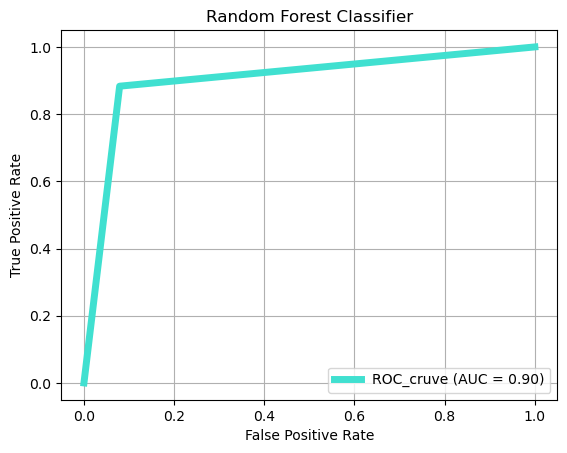

In [209]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(pred, y_test)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='ROC_cruve')
display.plot(lw=5,color='turquoise')
pt.title('Random Forest Classifier')
pt.grid()
pt.show()

## Confusion Matrix

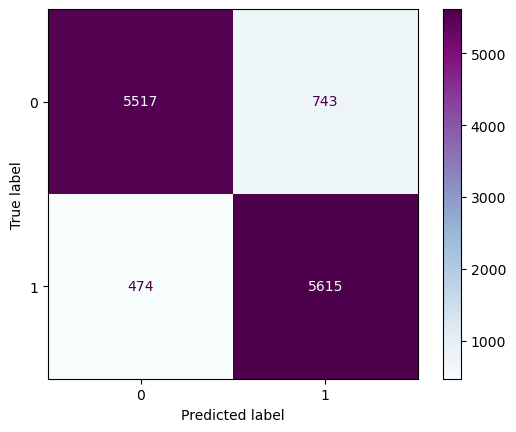

In [218]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap='BuPu')

## Saving the final model

In [219]:
import joblib
joblib.dump(fmodel,'Census_income.obj')

['Census_income.obj']